In [16]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

#  **loading and spliting the data**

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [18]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [19]:
print(X_train[0].shape)

(32, 32, 3)


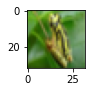

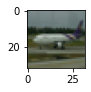

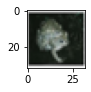

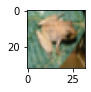

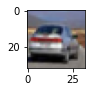

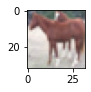

In [20]:
for i in range(232,238):
  plt.subplot(120+ 1 + i)
  img = X_train[i]
  plt.imshow(img)
  plt.show()

In [21]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test. shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
model = Sequential()

#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling

model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')

# training the model

model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=( X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 579s 1s/step - loss: 1.6103 - accuracy: 0.4052 - val_loss: 1.1794 - val_accuracy: 0.5772
Epoch 2/20
391/391 [==============================] - 576s 1s/step - loss: 1.1335 - accuracy: 0.5982 - val_loss: 0.9295 - val_accuracy: 0.6779
Epoch 3/20
391/391 [==============================] - 576s 1s/step - loss: 0.9391 - accuracy: 0.6707 - val_loss: 0.8136 - val_accuracy: 0.7187
Epoch 4/20
391/391 [==============================] - 574s 1s/step - loss: 0.8308 - accuracy: 0.7110 - val_loss: 0.7392 - val_accuracy: 0.7449
Epoch 5/20
391/391 [==============================] - 575s 1s/step - loss: 0.7474 - accuracy: 0.7401 - val_loss: 0.7430 - val_accuracy: 0.7420
Epoch 6/20
391/391 [==============================] - 573s 1s/step - loss: 0.6831 - accuracy: 0.7610 - val_loss: 0.6695 - val_accuracy: 0.7684
Epoch 7/20
391/391 [==============================] - 573s 1s/step - loss: 0.6237 - accuracy: 0.7807 - val_loss: 0.7126 - val_accuracy: 0.7527

# Predicting

In [23]:
classes = range(0,10)

names = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 109ms/step


In [24]:
print(predictions)

[[3.9172675e-05 1.6874465e-06 3.1344146e-02 3.6779814e-03 6.7931342e-01
  1.2042943e-02 4.3687213e-04 2.7312174e-01 6.8639956e-06 1.5074539e-05]
 [5.2422125e-05 9.2970695e-06 7.9441744e-01 1.9641653e-02 1.6051490e-03
  1.6336721e-01 1.4089358e-02 6.6075334e-03 1.9150726e-04 1.8473795e-05]
 [2.5077643e-06 1.2971691e-06 1.3707621e-03 6.9286120e-03 3.9482614e-04
  8.5276633e-04 9.9043322e-01 3.8316925e-06 1.0026753e-05 2.1463450e-06]
 [3.2030630e-06 9.7275084e-08 8.2013074e-05 9.7415984e-01 3.1642509e-03
  7.7662233e-04 2.1797730e-02 9.1353996e-07 2.4854353e-07 1.5201829e-05]
 [7.1806376e-08 9.9999857e-01 1.9155400e-16 5.2006824e-17 3.5257798e-19
  4.3397622e-19 1.7024035e-13 3.8637831e-19 1.1340926e-06 1.6066672e-07]
 [3.5532338e-07 9.9997830e-01 1.0864673e-10 3.8321762e-11 3.7685453e-13
  2.8712939e-12 7.9872382e-07 1.4341476e-14 1.8375382e-05 2.1021185e-06]
 [1.5958453e-02 6.3029394e-05 3.1290375e-02 4.8002991e-01 2.5519980e-03
  3.8217214e-01 8.1424452e-02 6.7627797e-04 5.7910718e-03 

In [25]:
for image in predictions:
  print(np.sum(image))

0.9999999
1.0
0.99999994
1.0000001
0.99999994
0.9999999
0.99999994
0.99999994
1.0


In [26]:
class_result = np.argmax(predictions, axis = -1)
print(class_result)

[4 2 6 3 1 1 3 6 8]


# **Final Object Detection**

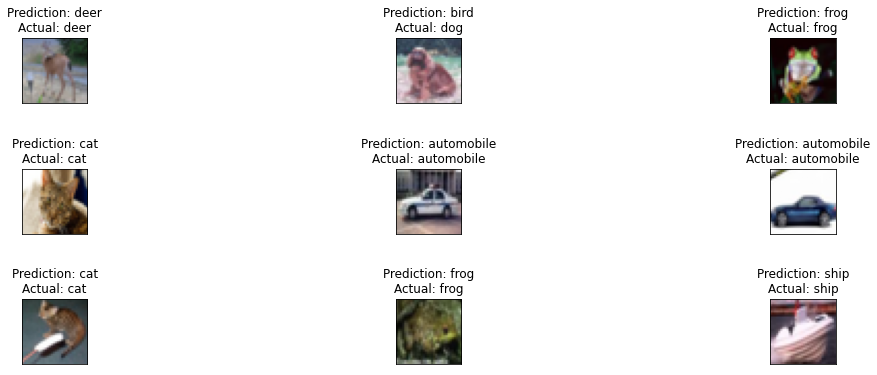

In [29]:
fig, axs = plt.subplots( 3, 3, figsize = (19,6))
fig. subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
  for key, value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  # plot the image
  axs[i].imshow(img)

#show the plot
plt.show()
      

